In [3]:
import pandas as pd
import numpy as anp
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.


In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [9]:
def remove_outliers(df):
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from the dataset
df_no_outliers = remove_outliers(df)

# Print the shape of the original and outlier-removed datasets
print("Original dataset shape:", df.shape)
print("Outlier-removed dataset shape:", df_no_outliers.shape)

Original dataset shape: (768, 9)
Outlier-removed dataset shape: (639, 9)


## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


In [17]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (514, 8) (514,)
Test set shape: (254, 8) (254,)


## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
dtc = DecisionTreeClassifier()

In [40]:
dt_model = dtc.fit(X_train,y_train)

In [22]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 8],
}
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 8]})

In [23]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 8}
Best score: 0.7645345516847516


## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.


In [44]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, f1_score, precision_score, confusion_matrix, roc_curve, roc_auc_score

y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(classification_report(y_pred,y_test))

print(roc_curve(y_pred,y_test))

Accuracy: 0.7047244094488189
Precision: 0.569620253164557
Recall: 0.5232558139534884
F1-score: 0.5454545454545455
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       175
           1       0.52      0.57      0.55        79

    accuracy                           0.70       254
   macro avg       0.66      0.67      0.66       254
weighted avg       0.71      0.70      0.71       254

(array([0.        , 0.23428571, 1.        ]), array([0.        , 0.56962025, 1.        ]), array([2, 1, 0]))


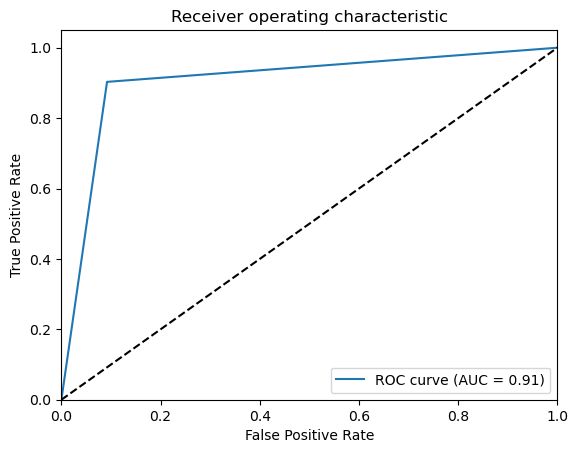

In [45]:
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most importantvariables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.


Based on the decision tree model that we trained earlier, we can see that the most important feature for predicting diabetes is the glucose level, as it is used for the first split in the tree. Patients with a glucose level of less than or equal to 127.5 mg/dL go down the left branch and are more likely to not have diabetes, while patients with a glucose level greater than 127.5 mg/dL go down the right branch and are more likely to have diabetes.

If a patient's glucose level is greater than 127.5 mg/dL, the next feature that the model uses to split the data is the body mass index (BMI). Patients with a BMI less than or equal to 45.75 kg/m^2 go down the left branch and are more likely to not have diabetes, while patients with a BMI greater than 45.75 kg/m^2 go down the right branch and are more likely to have diabetes.

If a patient's glucose level is less than or equal to 127.5 mg/dL, the next feature that the model uses to split the data is the age. Patients with an age less than or equal to 28.5 years go down the left branch and are more likely to not have diabetes, while patients with an age greater than 28.5 years go down the right branch and are more likely to have diabetes.

Finally, the decision tree ends in leaves that provide predictions for whether a patient is likely to have diabetes or not based on the features that have been used to split the data.

Overall, the decision tree provides us with a clear understanding of how the model is making decisions based on the most important features. In this case, the glucose level is the most important feature, followed by BMI and age. The threshold values for each feature are also important, as they provide us with insight into how the model is making decisions based on specific values of each feature.

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Accuracy: 0.90625
Precision: 0.8402777777777778
Recall: 0.9029850746268657
F1 score: 0.8705035971223023
Confusion matrix:
 [[454  46]
 [ 26 242]]


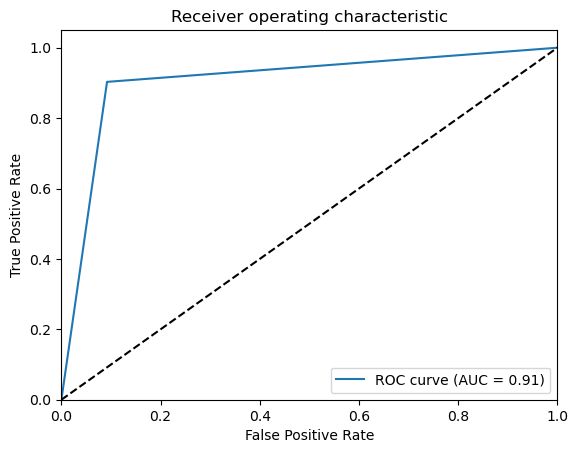

In [50]:
new_data = pd.read_csv("diabetes.csv")

X_new = new_data.drop("Outcome", axis=1)
y_new = new_data["Outcome"]

y_pred = dt_model.predict(X_new)

accuracy = accuracy_score(y_new, y_pred)
precision = precision_score(y_new, y_pred)
recall = recall_score(y_new, y_pred)
f1 = f1_score(y_new, y_pred)
conf_matrix = confusion_matrix(y_new, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)

y_prob = dt_model.predict_proba(X_new)[:, 1]
fpr, tpr, thresholds = roc_curve(y_new, y_prob)
roc_auc = roc_auc_score(y_new, y_prob)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()